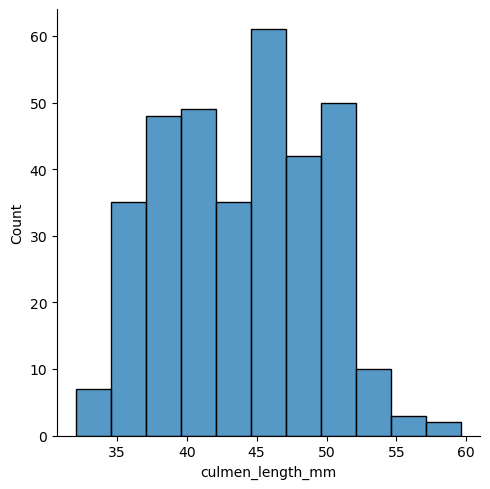

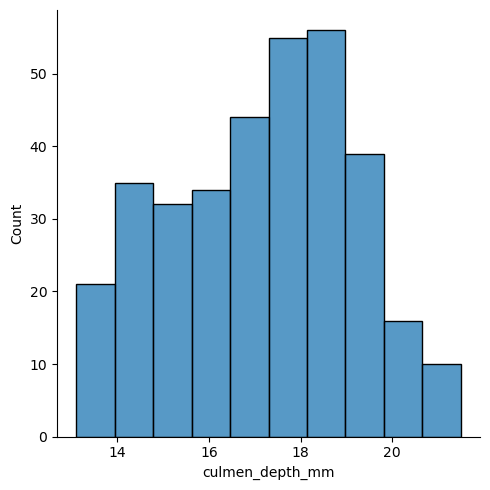

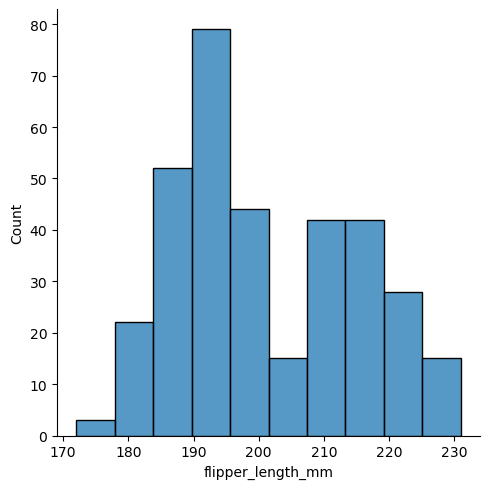

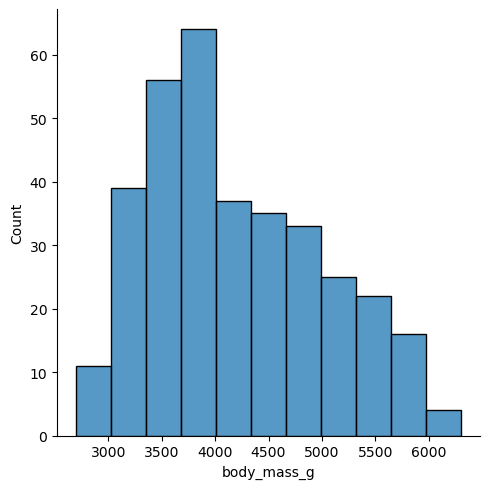

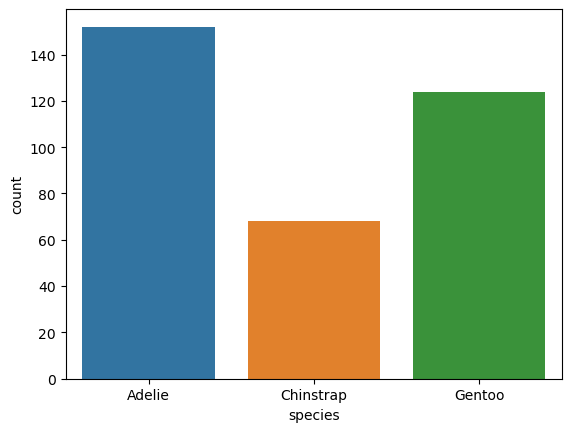

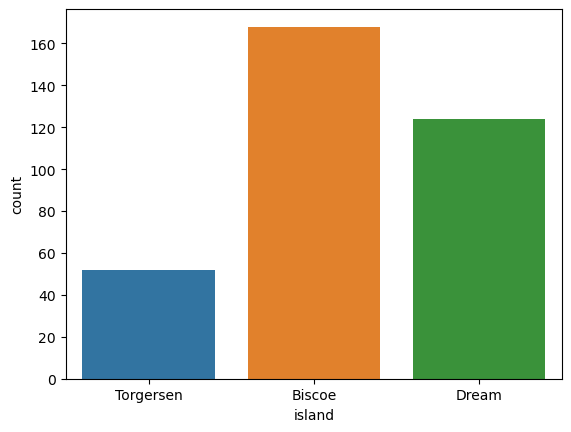

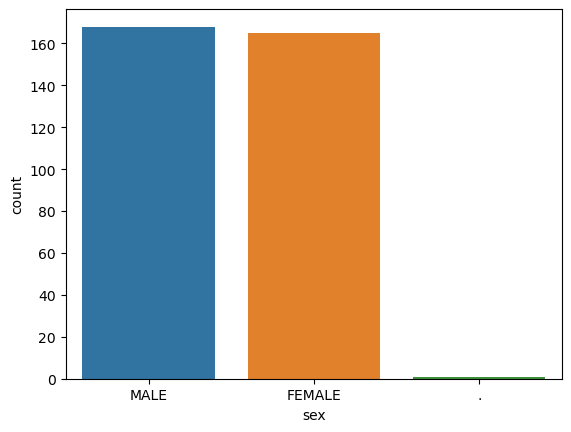

In [3]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv("penguins_size.csv")

sns.displot(df['culmen_length_mm'])
plt.show()

sns.displot(df['culmen_depth_mm'])
plt.show()

sns.displot(df['flipper_length_mm'])
plt.show()

sns.displot(df['body_mass_g'])
plt.show()

sns.countplot(x='species', data=df)
plt.show()

sns.countplot(x='island', data=df)
plt.show()

sns.countplot(x='sex', data=df)
plt.show()


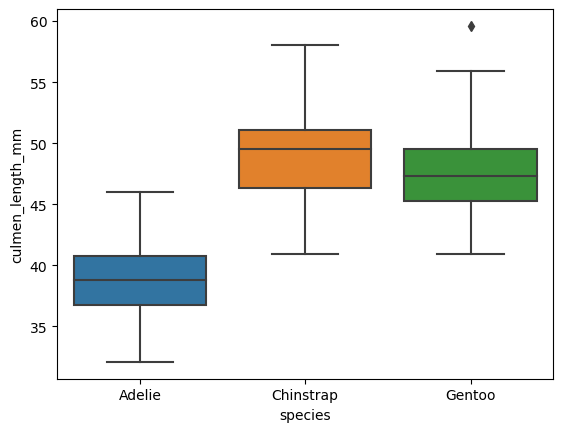

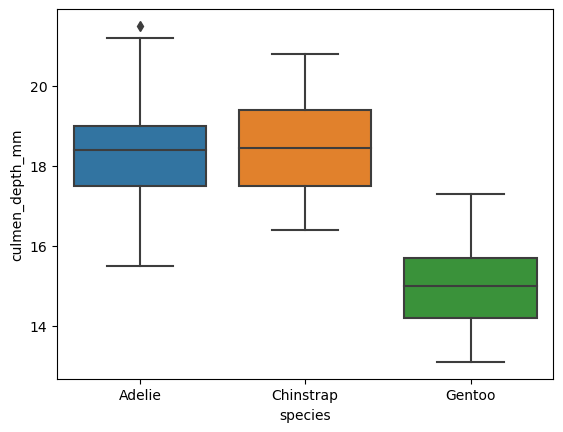

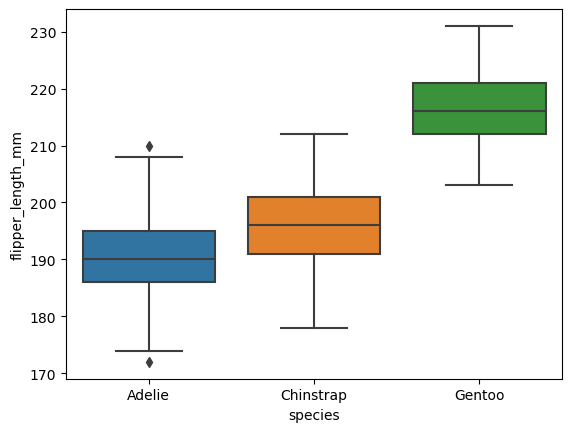

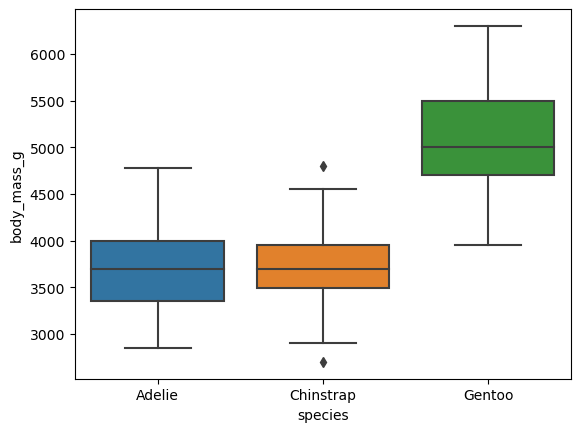

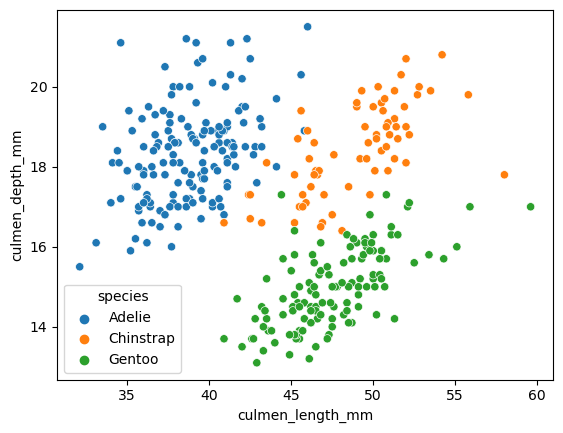

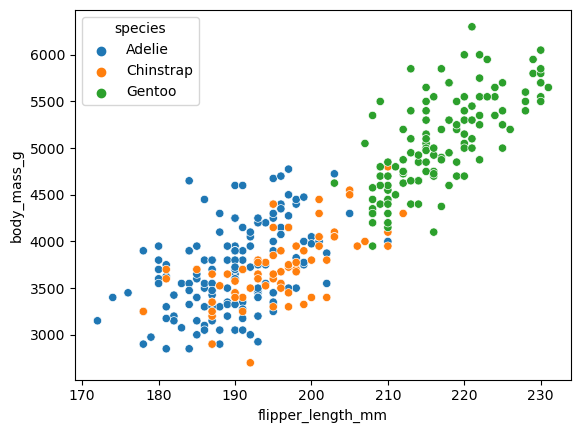

In [4]:
sns.boxplot(x='species', y='culmen_length_mm', data=df)
plt.show()

sns.boxplot(x='species', y='culmen_depth_mm', data=df)
plt.show()

sns.boxplot(x='species', y='flipper_length_mm', data=df)
plt.show()

sns.boxplot(x='species', y='body_mass_g', data=df)
plt.show()

sns.scatterplot(x='culmen_length_mm', y='culmen_depth_mm', hue='species', data=df)
plt.show()

sns.scatterplot(x='flipper_length_mm', y='body_mass_g', hue='species', data=df)
plt.show()


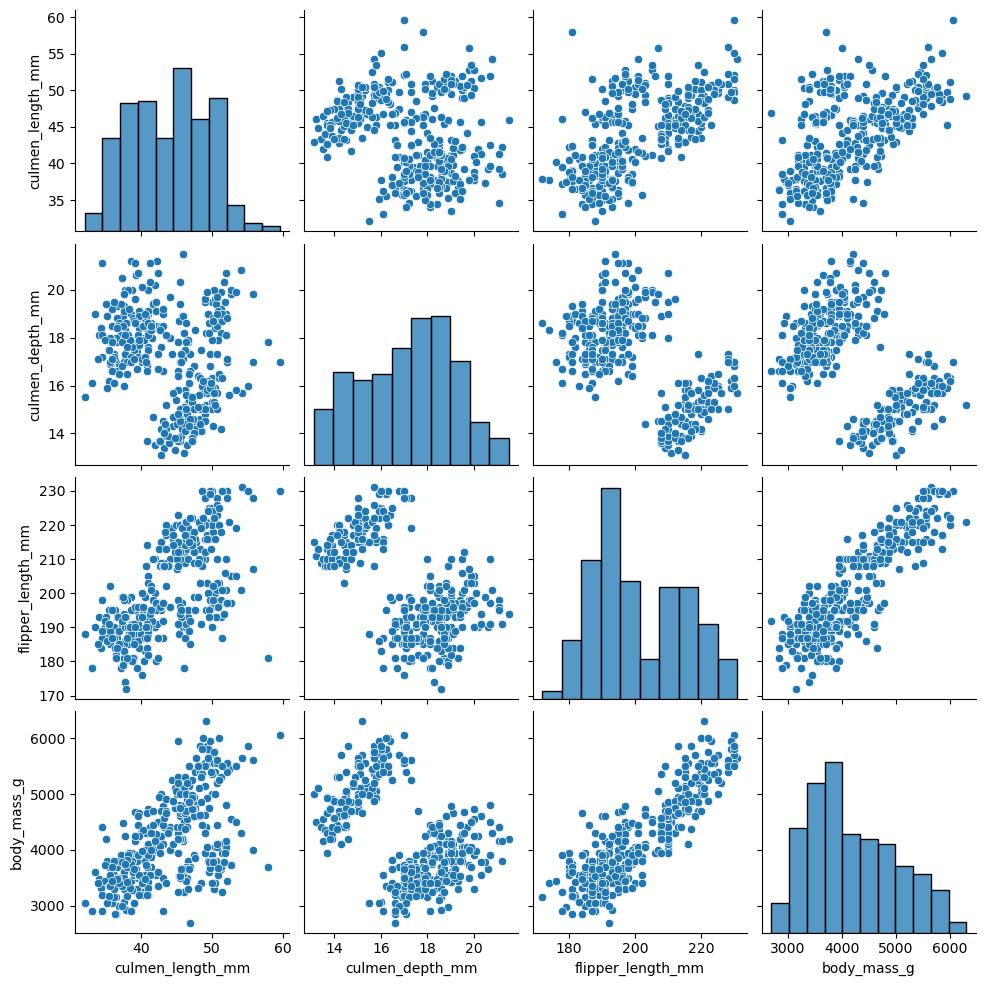

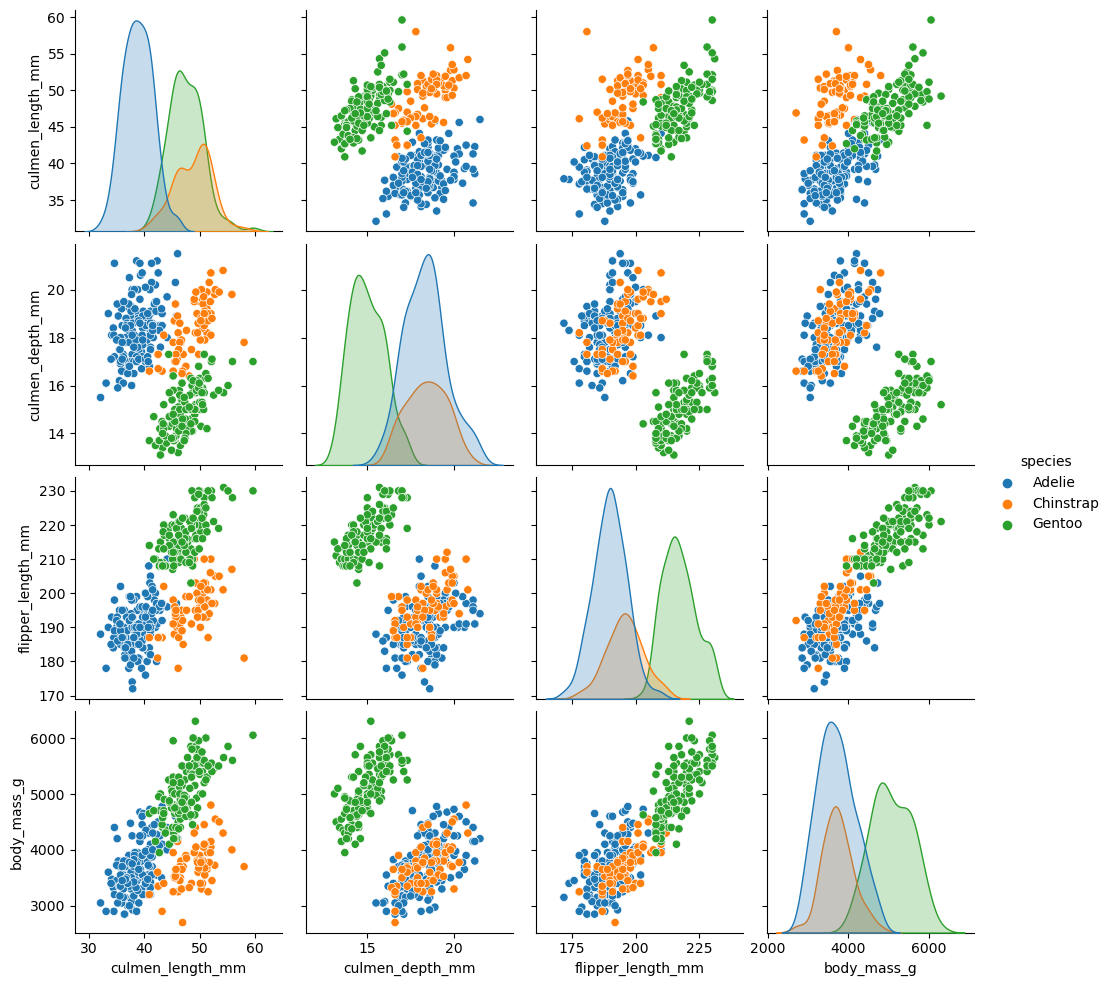

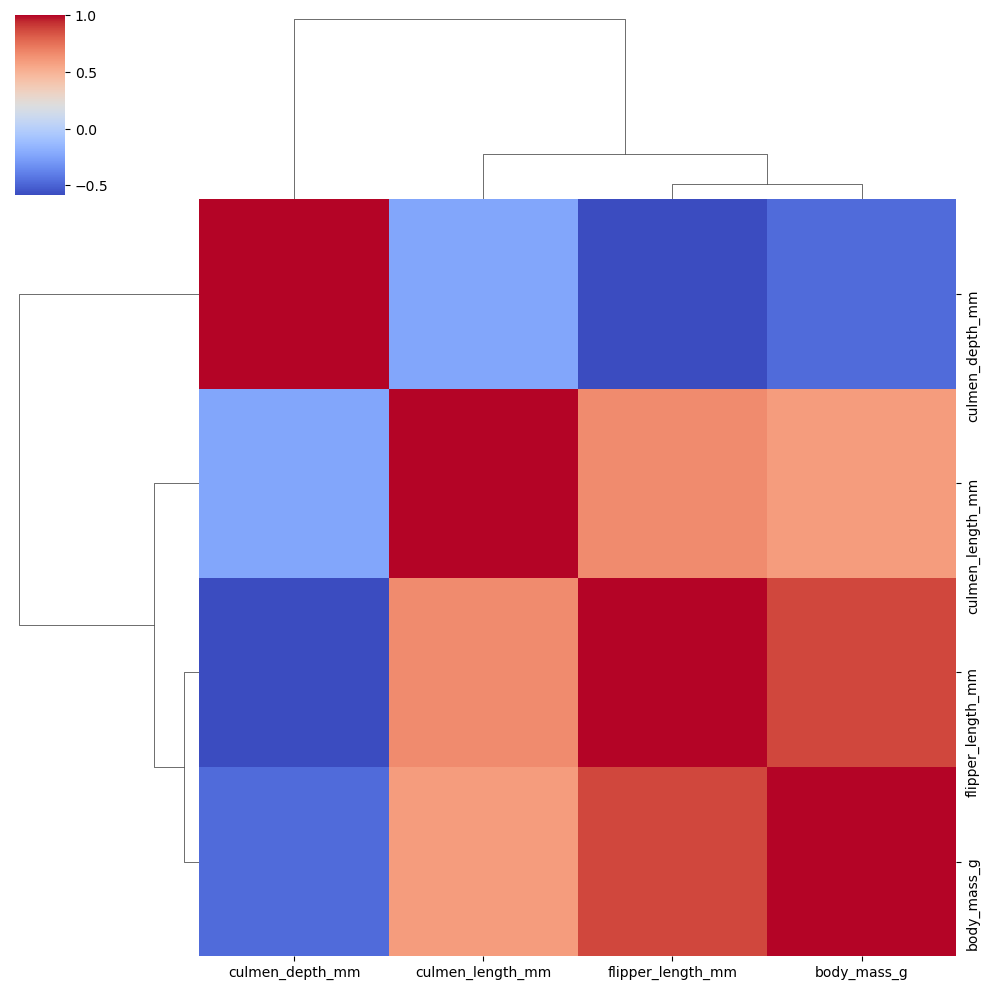

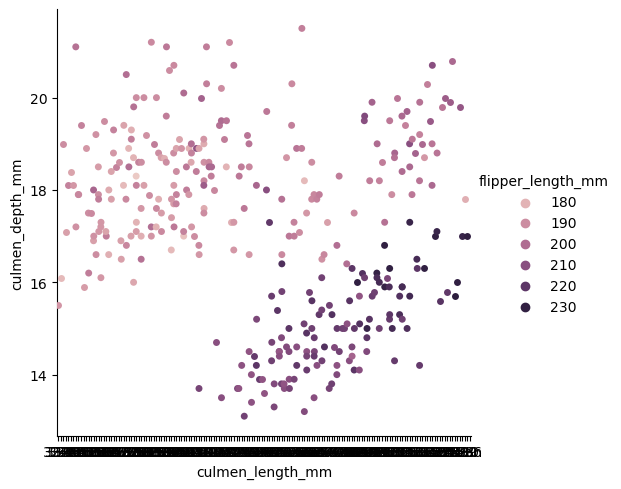

In [5]:
sns.pairplot(df)
plt.show()
sns.pairplot(df, hue='species')
plt.show()

sns.clustermap(df.corr(numeric_only=True), cmap='coolwarm')
plt.show()

sns.catplot(x='culmen_length_mm', y='culmen_depth_mm', hue='flipper_length_mm', data=df)
plt.show()

In [6]:
print(df.describe())

       culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g
count        342.000000       342.000000         342.000000   342.000000
mean          43.921930        17.151170         200.915205  4201.754386
std            5.459584         1.974793          14.061714   801.954536
min           32.100000        13.100000         172.000000  2700.000000
25%           39.225000        15.600000         190.000000  3550.000000
50%           44.450000        17.300000         197.000000  4050.000000
75%           48.500000        18.700000         213.000000  4750.000000
max           59.600000        21.500000         231.000000  6300.000000


In [7]:
print(df.isnull().sum())

# drop rows with missing values
df.dropna(inplace=True)
df.fillna(df.mean(numeric_only=True), inplace=True)

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64


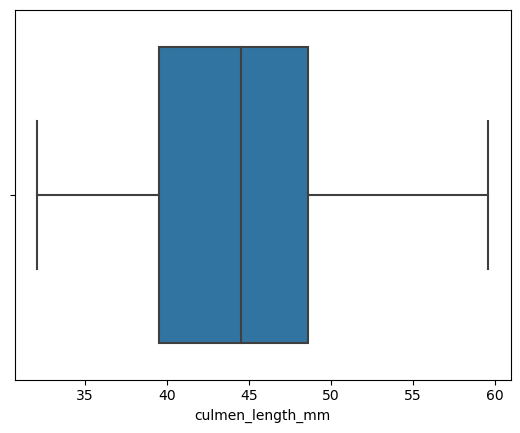

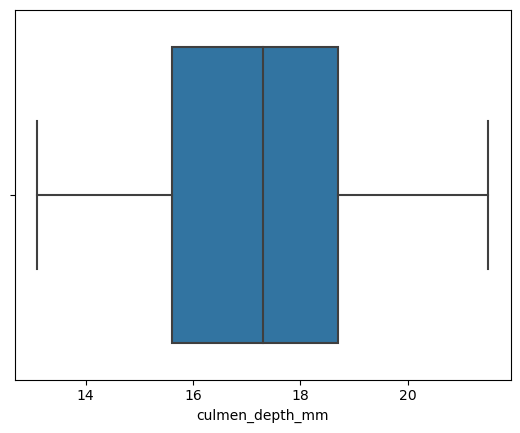

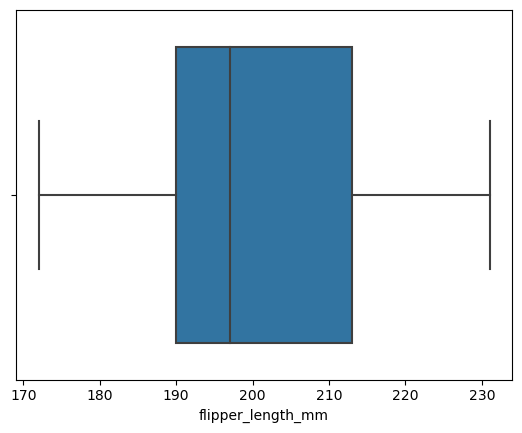

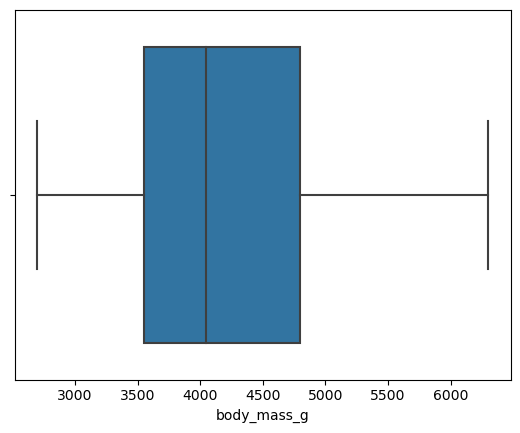

In [8]:
# identify outliers using boxplots
sns.boxplot(x='culmen_length_mm', data=df)
plt.show()

sns.boxplot(x='culmen_depth_mm', data=df)
plt.show()

sns.boxplot(x='flipper_length_mm', data=df)
plt.show()

sns.boxplot(x='body_mass_g', data=df)
plt.show()

# replace outliers with median values
median_culmen_length = df['culmen_length_mm'].median()
df.loc[df['culmen_length_mm'] > 50, 'culmen_length_mm'] = median_culmen_length

median_culmen_depth = df['culmen_depth_mm'].median()
df.loc[df['culmen_depth_mm'] > 20, 'culmen_depth_mm'] = median_culmen_depth

median_flipper_length = df['flipper_length_mm'].median()
df.loc[df['flipper_length_mm'] > 240, 'flipper_length_mm'] = median_flipper_length

median_body_mass = df['body_mass_g'].median()
df.loc[df['body_mass_g'] > 6000, 'body_mass_g'] = median_body_mass


In [9]:
# check for categorical columns
print(df.dtypes)

# perform encoding on categorical columns
df = pd.get_dummies(df, columns=['species', 'island', 'sex'], drop_first=True)

species               object
island                object
culmen_length_mm     float64
culmen_depth_mm      float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
dtype: object


In [11]:
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
df =pd.read_csv("penguins_size.csv")
scale = StandardScaler()
X = df[['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']]
X_scaled = scale.fit_transform(X)
print(X_scaled)

[[-0.88449874  0.78544923 -1.41834665 -0.56414208]
 [-0.81112573  0.1261879  -1.06225022 -0.50170305]
 [-0.66437972  0.43046236 -0.42127665 -1.18853234]
 ...
 [ 1.18828874 -0.73592307  1.50164406  1.93341896]
 [ 0.23443963 -1.19233476  0.7894512   1.24658968]
 [ 1.09657248 -0.53307343  0.86067049  1.49634578]]


In [ ]:
#Perform any clustering of an algorithm

from sklearn.cluster import KMeans

# initialize KMeans object with 3 clusters
kmeans = KMeans(n_clusters=3)

# extract cluster labels
labels = kmeans.labels_

# add cluster labels as a new column in the DataFrame
df['cluster'] = labels

# Create a new column 'cluster_labels' in the original dataframe
df['cluster_labels'] = None

# Assign the clustering labels to the new column
df['cluster_labels'] = labels

# Check the new column to ensure the clustering labels have been added to the dataframe
print(df.head())


In [21]:
# Select all columns except the target variable as independent variables
X = df[['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g', 'species_Chinstrap']]

# Select the target variable as the dependent variable
y = df['species_Chinstrap']

In [20]:
print(df.columns)

Index(['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm',
       'body_mass_g', 'species_Chinstrap', 'species_Gentoo', 'island_Dream',
       'island_Torgersen', 'sex_FEMALE', 'sex_MALE', 'cluster',
       'cluster_labels'],
      dtype='object')


In [23]:
from sklearn.model_selection import train_test_split

# Assign X and y
X = df[['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g', 'species_Chinstrap', 'species_Gentoo', 'island_Dream', 'island_Torgersen', 'sex_FEMALE', 'sex_MALE', 'cluster']]
y = df['species_Chinstrap']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the training and testing sets
print('X_train shape:', X_train.shape)
print('y_train shape:', y_train.shape)
print('X_test shape:', X_test.shape)
print('y_test shape:', y_test.shape)


X_train shape: (267, 11)
y_train shape: (267,)
X_test shape: (67, 11)
y_test shape: (67,)


In [29]:
#Train the model
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [34]:
#Test the model
from sklearn.metrics import accuracy_score
y_pred = logreg.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 1.0


In [35]:
# Measure the performance using Evaluation Metrics
from sklearn.metrics import confusion_matrix, classification_report

# predict target variable for the testing set
y_pred = logreg.predict(X_test)

# calculate confusion matrix and classification report
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred)
# calculate error rate
error_rate = 1 - accuracy


print('Confusion matrix:\n', cm)
print('Classification report:\n', cr)
print('Error rate:', error_rate)

Confusion matrix:
 [[54  0]
 [ 0 13]]
Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        54
           1       1.00      1.00      1.00        13

    accuracy                           1.00        67
   macro avg       1.00      1.00      1.00        67
weighted avg       1.00      1.00      1.00        67

Error rate: 0.0
